In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create some sample data (replace this with your dataset)
data = pd.read_csv("Pizza.csv")  # 100 samples with 3 features
np.set_printoptions(precision=4, suppress=True)
print("Formatted Array:")
print(data)

# Step 2: Standardize the data
numeric_columns = data.select_dtypes(include=[np.number]).columns
mean = np.mean(data[numeric_columns], axis=0)
std_dev = np.std(data[numeric_columns], axis=0)
standardized_data = (data[numeric_columns] - mean) / std_dev

print("Mean along each feature:", mean)
print("Standard deviation along each feature:", std_dev)
print("Standardized data:\n", standardized_data)


Formatted Array:
    brand     id   mois   prot    fat   ash  sodium   carb   cal
0       A  14069  27.82  21.43  44.87  5.11    1.77   0.77  4.93
1       A  14053  28.49  21.26  43.89  5.34    1.79   1.02  4.84
2       A  14025  28.35  19.99  45.78  5.08    1.63   0.80  4.95
3       A  14016  30.55  20.15  43.13  4.79    1.61   1.38  4.74
4       A  14005  30.49  21.28  41.65  4.82    1.64   1.76  4.67
..    ...    ...    ...    ...    ...   ...     ...    ...   ...
295     J  34044  44.91  11.07  17.00  2.49    0.66  25.36  2.91
296     J  24069  43.15  11.79  18.46  2.43    0.67  24.17  3.10
297     J  34039  44.55  11.01  16.03  2.43    0.64  25.98  2.92
298     J  14044  47.60  10.43  15.18  2.32    0.56  24.47  2.76
299     J  14045  46.84   9.91  15.50  2.27    0.57  25.48  2.81

[300 rows x 9 columns]
Mean along each feature: id        20841.040000
mois         40.903067
prot         13.373567
fat          20.229533
ash           2.633233
sodium        0.669400
carb         22.

In [2]:
# Step 3: Compute the covariance matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)
size_cc = covariance_matrix.size
shape_cc = covariance_matrix.shape
print (size_cc, shape_cc)
print(covariance_matrix)

64 (8, 8)
[[ 1.0033  0.0327 -0.0767 -0.0049 -0.0342 -0.0152  0.015  -0.0213]
 [ 0.0327  1.0033  0.3615 -0.1719  0.2664 -0.1026 -0.5938 -0.767 ]
 [-0.0767  0.3615  1.0033  0.4997  0.8266  0.4306 -0.8564  0.0705]
 [-0.0049 -0.1719  0.4997  1.0033  0.7943  0.9364 -0.6424  0.7671]
 [-0.0342  0.2664  0.8266  0.7943  1.0033  0.8108 -0.902   0.3276]
 [-0.0152 -0.1026  0.4306  0.9364  0.8108  1.0033 -0.6223  0.6742]
 [ 0.015  -0.5938 -0.8564 -0.6424 -0.902  -0.6223  1.0033 -0.0236]
 [-0.0213 -0.767   0.0705  0.7671  0.3276  0.6742 -0.0236  1.0033]]


In [3]:
# Step 4: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
print(eigenvalues)
print(eigenvectors)

[0.     0.0003 0.0276 0.0951 0.4085 1.0101 2.2982 4.187 ]
[[-0.0001  0.0003 -0.014   0.0208  0.1113 -0.9933 -0.0058 -0.0199]
 [ 0.4185  0.4465 -0.0046 -0.2226 -0.4178 -0.049  -0.6284  0.0645]
 [ 0.2767 -0.0001 -0.3898 -0.0089  0.7405  0.0822 -0.2696  0.379 ]
 [ 0.3777 -0.5254  0.1756 -0.5069 -0.193  -0.0452  0.2342  0.4465]
 [ 0.056   0.0588  0.6685  0.5554  0.0557 -0.0003 -0.1111  0.4718]
 [-0.0006  0.0032 -0.6033  0.4419 -0.4567 -0.0434  0.2015  0.4356]
 [ 0.7761 -0.0004  0.0061  0.3344  0.0491  0.019   0.3204 -0.4248]
 [ 0.012   0.7219  0.0788 -0.2783  0.1154 -0.002   0.5674  0.2445]]


In [4]:
# Step 5: Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print(eigenvalues)
print(eigenvectors)

[4.187  2.2982 1.0101 0.4085 0.0951 0.0276 0.0003 0.    ]
[[-0.0199 -0.0058 -0.9933  0.1113  0.0208 -0.014   0.0003 -0.0001]
 [ 0.0645 -0.6284 -0.049  -0.4178 -0.2226 -0.0046  0.4465  0.4185]
 [ 0.379  -0.2696  0.0822  0.7405 -0.0089 -0.3898 -0.0001  0.2767]
 [ 0.4465  0.2342 -0.0452 -0.193  -0.5069  0.1756 -0.5254  0.3777]
 [ 0.4718 -0.1111 -0.0003  0.0557  0.5554  0.6685  0.0588  0.056 ]
 [ 0.4356  0.2015 -0.0434 -0.4567  0.4419 -0.6033  0.0032 -0.0006]
 [-0.4248  0.3204  0.019   0.0491  0.3344  0.0061 -0.0004  0.7761]
 [ 0.2445  0.5674 -0.002   0.1154 -0.2783  0.0788  0.7219  0.012 ]]


In [5]:
# Step 6: Choose the number of components (or a threshold for explained variance)
n_components = 2  # Choose the number of principal components


In [6]:
# Step 7: Select the top 'n_components' eigenvectors
selected_eigenvectors = eigenvectors[:, :n_components]

In [7]:
# Step 8: Project the data onto the selected eigenvectors to obtain the principal components
final_result = np.dot(standardized_data, selected_eigenvectors)

In [8]:
# Step 9: Print the final result
print("Final Result after PCA:")
print(final_result)


Final Result after PCA:
[[ 5.029   2.6839]
 [ 5.0424  2.534 ]
 [ 4.8242  2.6784]
 [ 4.4884  2.2898]
 [ 4.4908  2.164 ]
 [ 4.5234  2.1727]
 [ 4.3341  2.0618]
 [ 4.7765  2.3578]
 [ 4.8731  2.6858]
 [ 4.9349  2.6631]
 [ 4.8596  2.7413]
 [ 4.91    2.7472]
 [ 4.6292  2.5839]
 [ 4.44    2.2964]
 [ 4.457   2.1293]
 [ 4.7434  2.4634]
 [ 4.435   1.8247]
 [ 4.1918  1.7978]
 [ 4.4868  1.8824]
 [ 4.5974  2.2314]
 [ 4.8187  2.9543]
 [ 4.7841  2.7747]
 [ 4.5082  2.1587]
 [ 4.2438  2.1208]
 [ 4.4795  2.0142]
 [ 4.503   2.3681]
 [ 4.5956  2.5978]
 [ 4.4585  2.4302]
 [ 4.7401  2.3572]
 [ 1.88   -0.4807]
 [ 1.3313 -1.121 ]
 [ 1.7845 -0.3011]
 [ 1.6901 -0.6463]
 [ 1.612  -0.7219]
 [ 1.7708 -0.5198]
 [ 1.8163 -0.5695]
 [ 1.3048 -0.5824]
 [ 1.004  -1.2945]
 [ 1.6142 -1.0747]
 [ 1.6571 -0.6403]
 [ 1.6747 -0.5064]
 [ 1.8165 -0.7854]
 [ 1.769  -0.5084]
 [ 1.0358 -1.5473]
 [ 0.9795 -1.6927]
 [ 1.0791 -1.3587]
 [ 1.684  -0.5148]
 [ 1.8213 -0.6296]
 [ 1.5199 -1.0925]
 [ 1.6128 -0.5839]
 [ 1.7797 -0.4551]
 [ 1.71

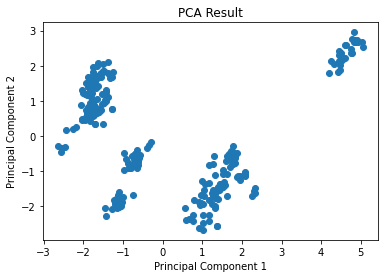

In [9]:
# Step 10: Visualize the results (for 2D data)
if n_components == 2:
    plt.scatter(final_result[:, 0], final_result[:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result')
    plt.show()